
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>

---
---
  
# Análisis Estadístico de Datos - 2023

* **Profesor:** Diego Ravignani Guerrero
* **JTP:** Ezequiel Enrique Rodriguez

---
---

## Test del efecto hipnótico de la hiosciamina

The probable error of a mean, Student, Biometrika volumen 6, issue 1, (1908), section IX, pág. 20.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
# Para cargar archivos de texto alojados en Colab
# Dar los permisos!
# 2 load the .dat file automatically in colab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# store .dat content in df
# test_chi2_1k.txt
dat_file_Gid = '1_XF6ujE15YIAtaxjkNamD1APXlmirOXL'
downloaded = drive.CreateFile({'id':dat_file_Gid})
downloaded.GetContentFile('test_student.csv')

**Datos**

In [3]:
scyamine_data = pd.read_csv('test_student.csv')
scyamine_data

,Dextro,Levo
0,0.7,1.9
1,-1.6,0.8
2,-0.2,1.1
3,-1.2,0.1
4,-0.1,-0.1
5,3.4,4.4
6,3.7,5.5
7,0.8,1.6
8,0.0,4.6
9,2.0,3.4


Pandas dataframe boxplot (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

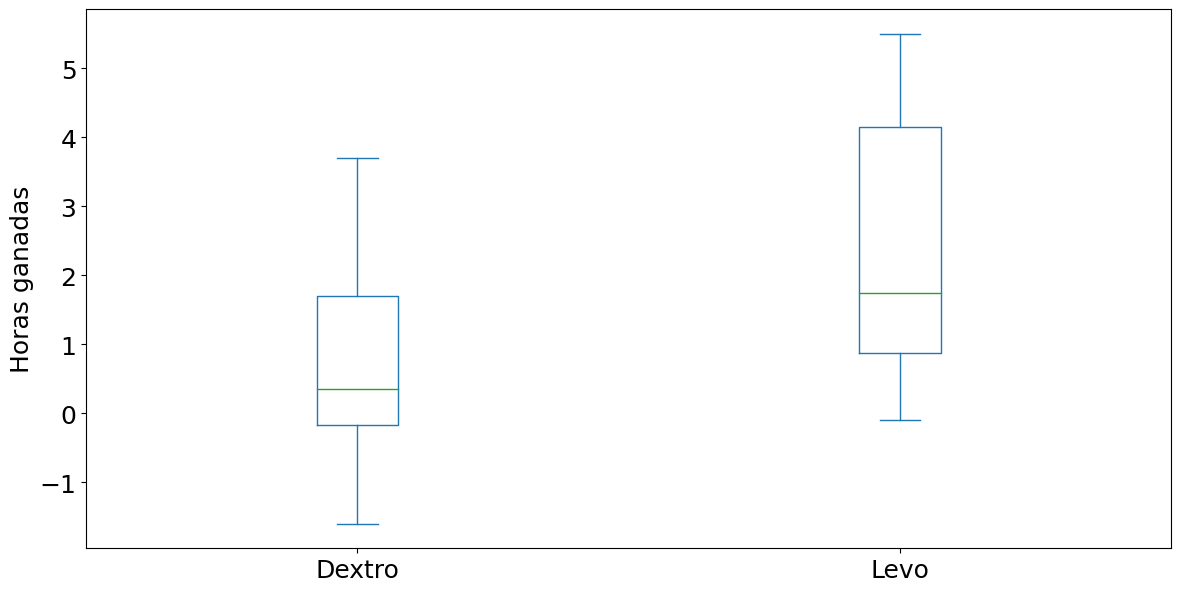

In [4]:
fsize, lsize = 18, 12 # tamaño de fuentes
scyamine_data.plot(kind='box', fontsize=fsize, figsize=(14,7))
plt.ylabel(ylabel='Horas ganadas', fontsize=fsize)
plt.show()

**Estadística t de Student**

Media de los datos

In [5]:
sample_mean = scyamine_data.mean()
sample_mean

Dextro    0.75
Levo      2.33
dtype: float64

Desviación estándar de los datos - *pandas aplica la corrección de Bessel por defecto!*

In [6]:
sample_dev = scyamine_data.std(ddof=1)
sample_dev

Dextro    1.789010
Levo      2.002249
dtype: float64

Desviación estándar de la media muestral

In [7]:
ndata = scyamine_data.shape[0]
ndata

10

In [8]:
mean_dev = sample_dev / math.sqrt(ndata)
mean_dev

Dextro    0.565735
Levo      0.633167
dtype: float64

Número de grados de libertad

In [9]:
ndof = scyamine_data.shape[0] - 1
ndof

9

Estadística t de Studen: $t = \frac{\bar{x}}{s/\sqrt{n}}$, toma $\mu = 0$ como hipótesis nula

In [10]:
t_statistic = sample_mean / mean_dev
t_statistic

Dextro    1.325710
Levo      3.679916
dtype: float64

In [11]:
pvalue =stats.t.sf(t_statistic, df=ndof)
print(f'Pvalue scyamine dextro: {pvalue[0]:.4f}')
print(f'Pvalue scyamine levo: {pvalue[1]:.4f}')

Pvalue scyamine dextro: 0.1088
Pvalue scyamine levo: 0.0025


### **Figura**

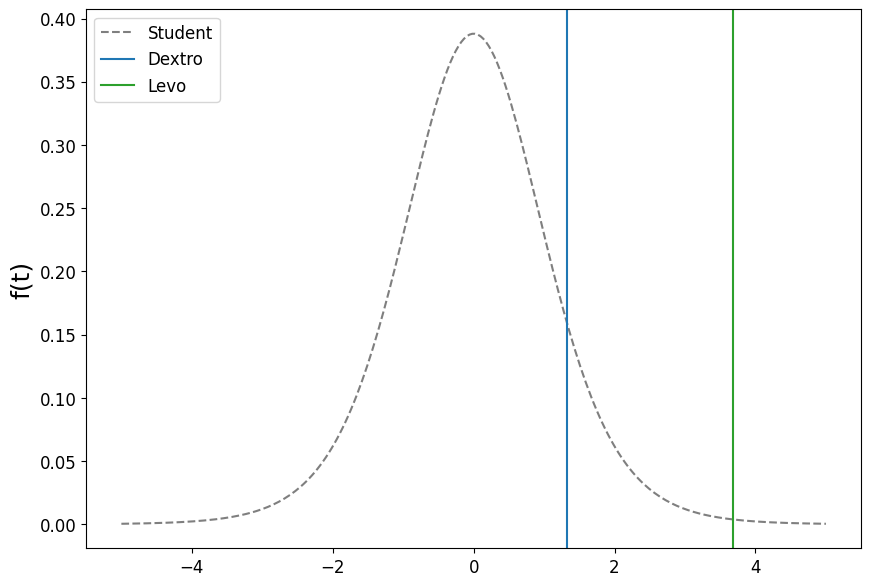

In [12]:
fig2, ax2 = plt.subplots(figsize=(10,7))
ax2.set_ylabel('f(t)', fontsize=fsize)
x = np.linspace(-5,5,256)
ax2.plot(x, stats.t.pdf(x, ndof), ls='--', color='tab:grey', label='Student')
ax2.axvline(t_statistic[0], color='tab:blue', label='Dextro')
ax2.axvline(t_statistic[1], color='tab:green', label='Levo')
ax2.legend(fontsize=lsize)
ax2.tick_params(axis='both', which='major', labelsize=lsize)
plt.show()

## Test de Student con dos muestras

$H_0$: Levo es igual de hipnótica que dextro <br>

In [13]:
z = scyamine_data['Levo']-scyamine_data['Dextro']
z

0    1.2
1    2.4
2    1.3
3    1.3
4    0.0
5    1.0
6    1.8
7    0.8
8    4.6
9    1.4
dtype: float64

In [14]:
print("Media de los datos: ", z.mean())

Media de los datos:  1.58


In [15]:
print("Desviación estándar de los datos: ", z.std(ddof=1))

Desviación estándar de los datos:  1.2299954832798732


In [16]:
zmean_sigma = z.std()/ math.sqrt(ndata)
print("Desviación estándar de la media: ", zmean_sigma )

Desviación estándar de la media:  0.3889587238883952


Estadística t de Student

In [17]:
t2 = z.mean() / zmean_sigma
t2

4.062127683382037

In [18]:
pvalue = stats.t.sf(t2, df=ndof)
print(f'Pvalue: {pvalue:.1e}')

Pvalue: 1.4e-03


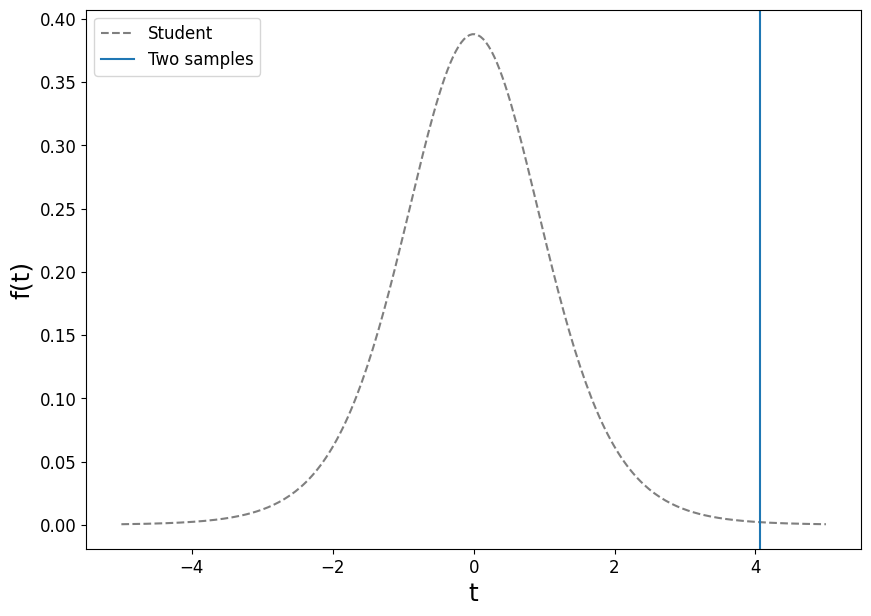

In [19]:
fig2, ax2 = plt.subplots(figsize=(10,7))
ax2.set_xlabel('t', fontsize=fsize)
ax2.set_ylabel('f(t)', fontsize=fsize)
x = np.linspace(-5,5,256)
ax2.plot(x, stats.t.pdf(x, ndof), ls='--', color='tab:grey', label='Student')
ax2.axvline(t2, color='tab:blue', label='Two samples')
ax2.legend(fontsize=lsize)
ax2.tick_params(axis='both', which='major', labelsize=lsize)
plt.show()

Informe del resultado

In [20]:
alpha = pvalue
print(f'Confirmo que la hiosciamina levo es más hipnótica que la dextro con una signficancia de {100*alpha:.2f}%')

Confirmo que la hiosciamina levo es más hipnótica que la dextro con una signficancia de 0.14%


In [21]:
CL = 1 - alpha
print(f'Confirmo que la hiosciamina levo es más hipnótica que la dextro con un nivel de confianza de {100*CL:.2f}%')

Confirmo que la hiosciamina levo es más hipnótica que la dextro con un nivel de confianza de 99.86%


In [22]:
nsigmas = stats.norm.ppf(CL)
print(f'Confirmo que la hiosciamina levo es más hipnótica que la dextro con un nivel de confianza de {nsigmas:.1f} sigmas')

Confirmo que la hiosciamina levo es más hipnótica que la dextro con un nivel de confianza de 3.0 sigmas
